In [1]:
#For all questions below, use these data sets: 
#sales.csv, 
#Superstore.csv, 
#house.csv, 
#advertising.csv

In [2]:
#import packages
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn import datasets 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import statsmodels.api as sm 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import * # import all libraries under sklearn.metrics

In [3]:
#Load data
sales = pd.read_csv('sales.csv')
advertising = pd.read_csv('advertising.csv')
superstore = pd.read_csv('Superstore.csv')
house = pd.read_csv('house.csv')

In [4]:
#1. Use the sales data. 
#Create a line plot of price vs. week number for the first 10 weeks in the data. 
#Which week number had the lowest price (in the first 10 weeks)? Enter the week number.

In [5]:
Q1dat = sales.iloc[0:10]
Q1dat

,week,date,price,quantity,cost
0,1,01-Feb-19,1.84,0,0.36
1,2,08-Feb-19,1.39,11,0.70
2,3,15-Feb-19,1.47,9,0.87
3,4,22-Feb-19,1.15,3,0.91
4,5,01-Mar-19,1.76,12,0.50
5,6,08-Mar-19,1.96,3,0.52
6,7,15-Mar-19,1.89,14,0.41
7,8,22-Mar-19,1.92,16,0.61
8,9,29-Mar-19,1.96,19,0.99
9,10,05-Apr-19,1.44,10,0.30


<Axes: xlabel='week', ylabel='price'>

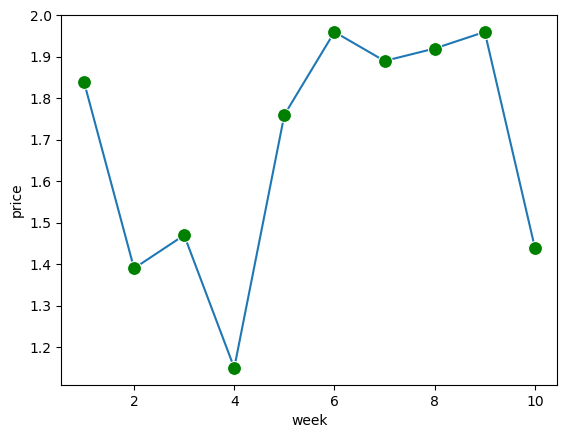

In [6]:
sns.lineplot(x = 'week', y = 'price', marker = 'o', markersize = 10, markerfacecolor = 'g', data = Q1dat)

In [7]:
# 2. Use the Superstore data. 
#Build a linear regression with statsmodels using 
#sales as the y-variable, and unit price and region dummies as the x-variables. 
#What is the p-value for south region? Round to nearest 3 decimals.

In [8]:
superstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9426 entries, 0 to 9425
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Category             9426 non-null   object 
 1   City                 9426 non-null   object 
 2   Container            9426 non-null   object 
 3   Customer ID          9426 non-null   int64  
 4   Customer Name        9426 non-null   object 
 5   Customer Segment     9426 non-null   object 
 6   Department           9426 non-null   object 
 7   Discount             9426 non-null   float64
 8   Item ID              9426 non-null   int64  
 9   Item                 9426 non-null   object 
 10  Number of Records    9426 non-null   int64  
 11  Order Date           9426 non-null   object 
 12  Order ID             9426 non-null   int64  
 13  Order Priority       9426 non-null   object 
 14  Order Quantity       9426 non-null   int64  
 15  Postal Code          9426 non-null   i

In [9]:
yQ2 = superstore['Sales']
Countries = pd.get_dummies(data = superstore.Region, drop_first = True, dtype = int)
xQ2 = pd.concat([superstore['Unit Price'], Countries], axis = 1)
xQ2 = sm.add_constant(xQ2)

In [10]:
Q2mod = sm.OLS(yQ2, xQ2).fit()
Q2pred = Q2mod.predict(xQ2)

Q2mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.189
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     549.2
Date:                Tue, 10 Oct 2023   Prob (F-statistic):               0.00
Time:                        17:53:31   Log-Likelihood:                -86499.
No. Observations:                9426   AIC:                         1.730e+05
Df Residuals:                    9421   BIC:                         1.730e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        561.1422     46.512     12.065      0.000     469.969     652.315
Unit Price     4.0061      0.086     46.764      0.000       3.838       4.174
East         123.2920     62.305      1.979      0.048       1.160     245.424
South        -70.4774     71.946     -0.980      0.327    -211.506      70.552
West          37.3967     70.210      0.533      0.594    -100.230     175.023
==============================================================================
Omnibus:                    17098.945   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         55499361.803
Skew:                          12.919   Prob(JB):                         0.00
Kurtosis:                     378.023   Cond. No.                     1.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [11]:
#3. Use the house data. 
#Train a Lasso and Ridge regression separately with sklearn 
#MEDV as the y-variable
#CRIM, ZN,INDUS, CHAS, NOX, RM, AGE as the x-variables. 
#Use random_state=101. Which model generates more coefficients close to 0?

In [12]:
yQ3 = house['MEDV']
xQ3 = house[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE']]

In [13]:
lassoQ3 = Lasso()
lassoQ3.fit(xQ3, yQ3)

coeff_df = pd.DataFrame(lassoQ3.coef_,xQ3.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.196625
ZN,0.028098
INDUS,-0.201293
CHAS,0.000000
NOX,-0.000000
RM,5.246829
AGE,-0.024476


In [14]:
ridgeQ3 = Ridge()
ridgeQ3.fit(xQ3, yQ3)

coeff_df = pd.DataFrame(ridgeQ3.coef_,xQ3.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.172047
ZN,0.014509
INDUS,-0.143715
CHAS,4.696820
NOX,-3.017937
RM,7.356429
AGE,-0.025762


In [15]:
#4. Use the advertising data. Use sklearn. 
#Train the following logistic regressions with x-variables:
#• Model 1: Age, Daily Time Spent on Site
#• Model 2: Age, Daily Time Spent on Site, Area Income, Male
#• Model 3: Age, Daily Time Spent on Site, Area Income, Male, Daily Internet Usage
#Use test_size=0.3, random_state=101 for all models. 
#Which model has the highest AUC for test data? Enter the model number.

In [16]:
#Custom Function
def classification_metrics(Y_pred, Y_true):
    acc = accuracy_score(Y_true, Y_pred)
    precision = precision_score(Y_true, Y_pred)
    recall = recall_score(Y_true, Y_pred)
    f1score = f1_score(Y_true, Y_pred)
    auc = roc_auc_score(Y_true, Y_pred)

    return acc, precision, recall, f1score, auc

def display_metrics(classifierName, Y_pred, Y_true):
    print ("______________________________________________")
    print ("Model: "+classifierName)
    acc, precision, recall, f1score, auc = classification_metrics(Y_pred, Y_true)
    # returns 5 vars: acc, precision, recall, f1score, auc
    # print them below
    print ("Accuracy: "+str(acc))
    print ("Precision: "+str(precision))
    print ("Recall: "+str(recall))
    print ("F1-score: "+str(f1score))
    print ("AUC: "+str(auc))
    print ("______________________________________________")
    print ("")

In [17]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   Male                      1000 non-null   int64  
 6   Country                   1000 non-null   object 
 7   Timestamp                 1000 non-null   object 
 8   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 70.4+ KB


In [18]:
yQ4 = advertising['Clicked on Ad']
x1Q4 = advertising[['Age', 'Daily Time Spent on Site']]
x2Q4 = advertising[['Age', 'Daily Time Spent on Site', 'Area Income', 'Male']]
x3Q4 = advertising[['Age', 'Daily Time Spent on Site', 'Area Income', 'Male', 'Daily Internet Usage']]
yQ4

0      0
1      1
2      1
3      0
4      1
      ..
995    1
996    1
997    1
998    0
999    0
Name: Clicked on Ad, Length: 1000, dtype: int64

In [19]:
temp = [x1Q4, x2Q4, x3Q4]
temp

[     Age  Daily Time Spent on Site
 0     41                     82.03
 1     44                     80.03
 2     59                     51.38
 3     40                     77.07
 4     50                     51.87
 ..   ...                       ...
 995   29                     67.35
 996   29                     56.64
 997   48                     36.91
 998   26                     81.56
 999   36                     83.98
 
 [1000 rows x 2 columns],
      Age  Daily Time Spent on Site  Area Income  Male
 0     41                     82.03     71511.08     0
 1     44                     80.03     24030.06     0
 2     59                     51.38     42362.49     0
 3     40                     77.07     44559.43     0
 4     50                     51.87     51869.87     0
 ..   ...                       ...          ...   ...
 995   29                     67.35     47510.42     0
 996   29                     56.64     55984.89     1
 997   48                     36.91     54645

In [20]:
AUC = []
modQ4 = LogisticRegression()

for i in temp:
    xQ4tr, xQ4te, yQ4tr, yQ4te = train_test_split(i, yQ4, test_size = 0.3, random_state = 101)
    modQ4.fit(xQ4tr, yQ4tr)
    yQ4Pred = modQ4.predict(xQ4te)
    
    acc, precision, recall, f1score, auc = classification_metrics(yQ4Pred, yQ4te)
    AUC.append(auc)

C:\Users\Test\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
AUC

[0.8901974833191527, 0.870202857014912, 0.8957503022703863]